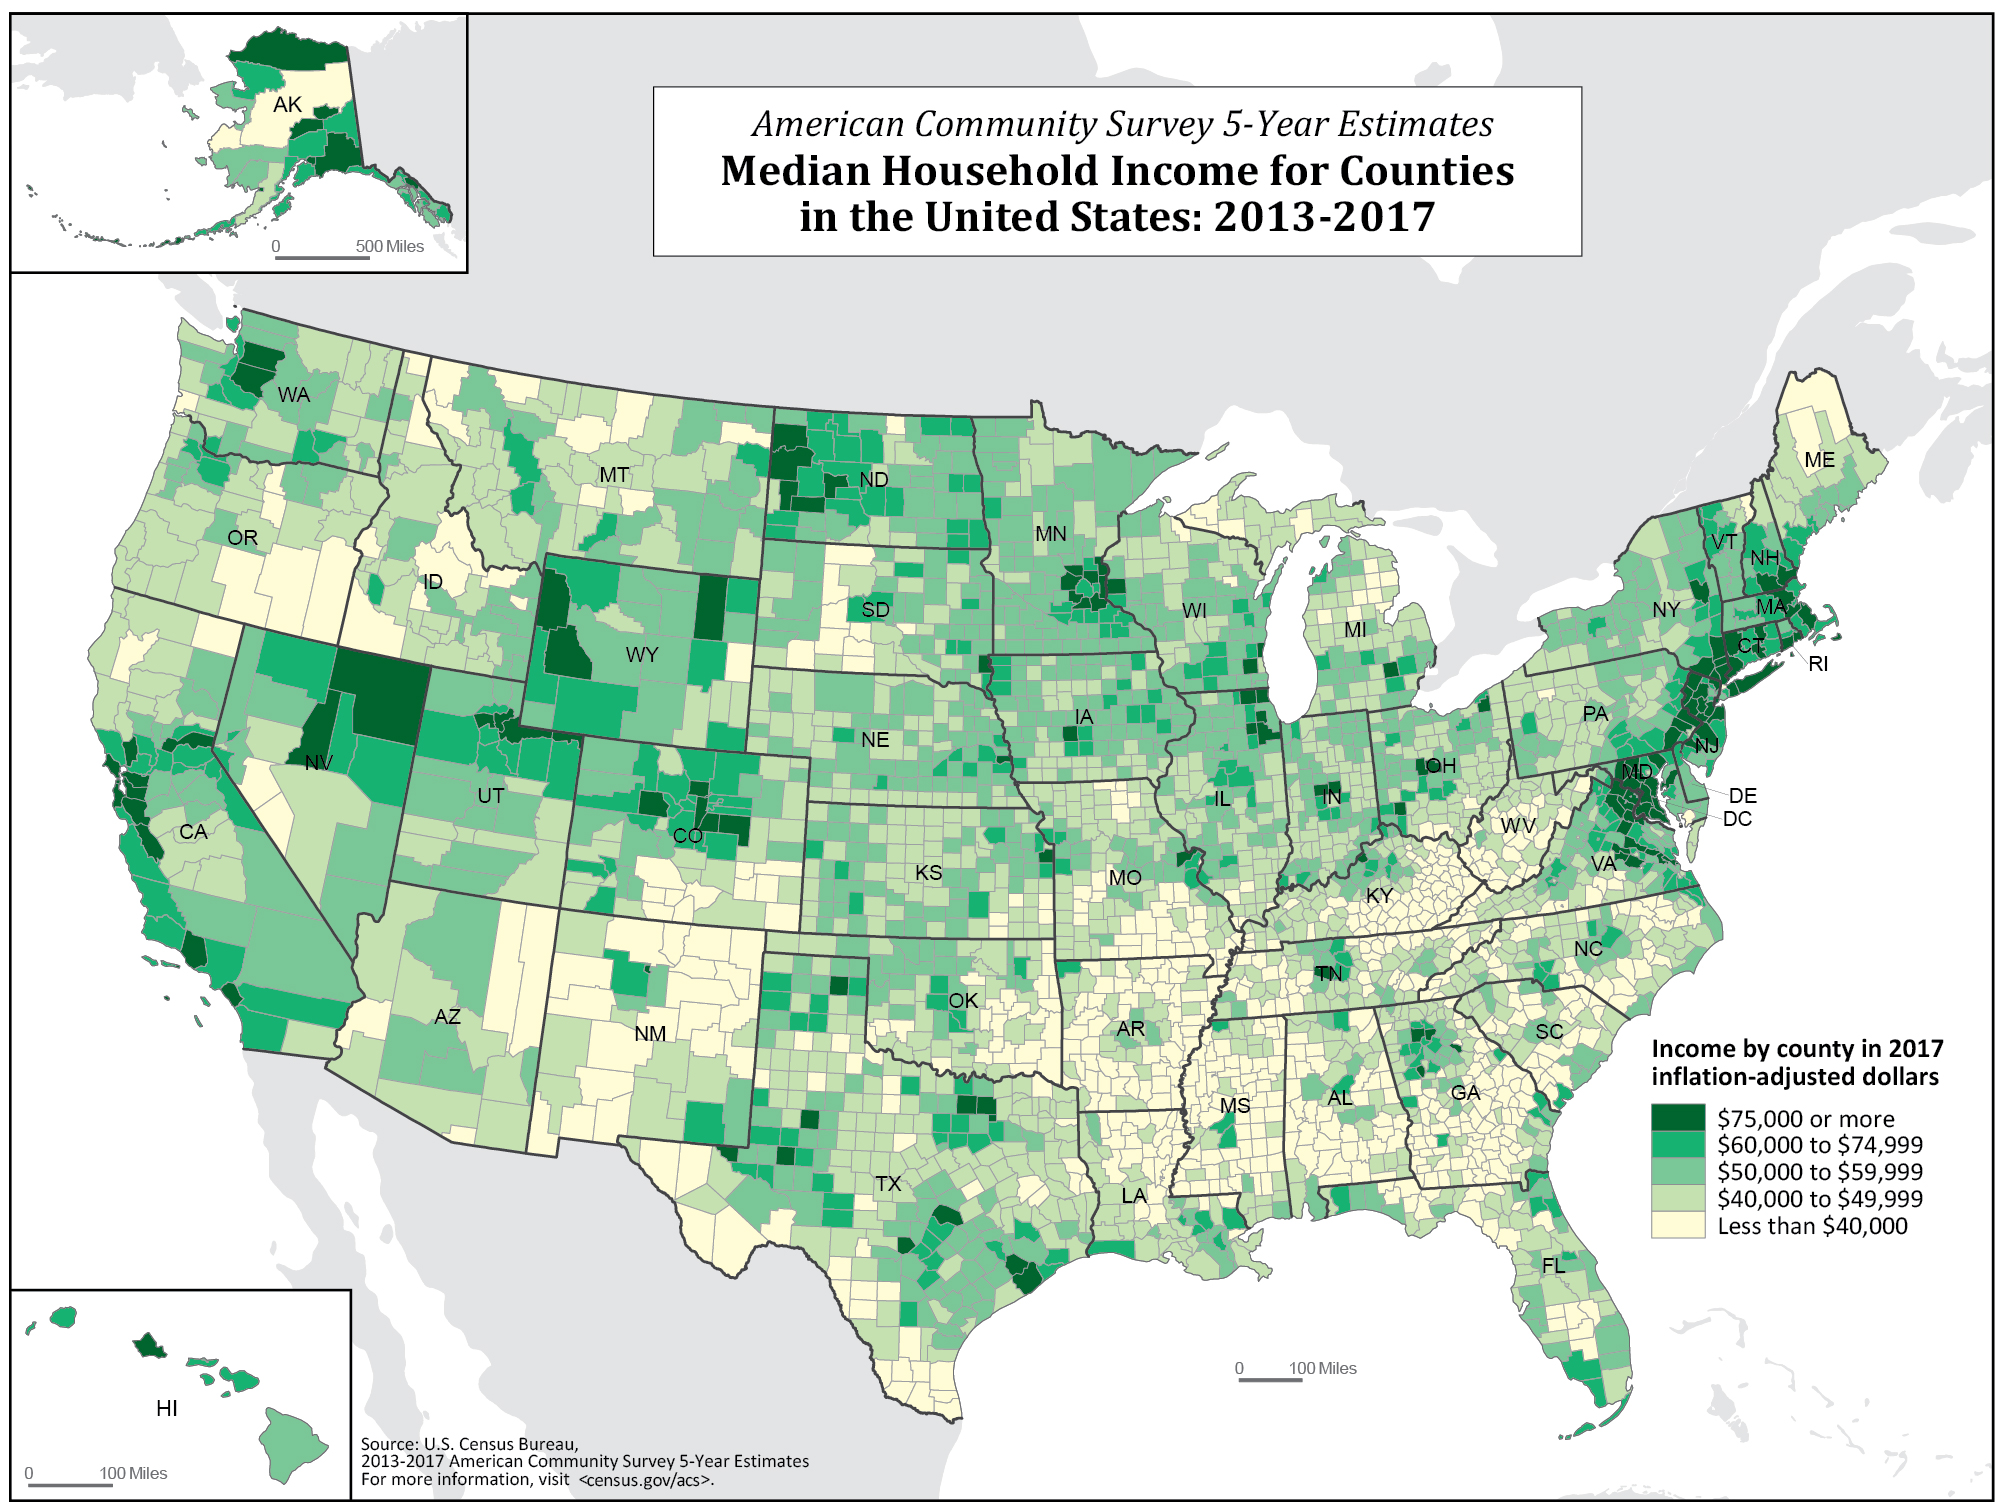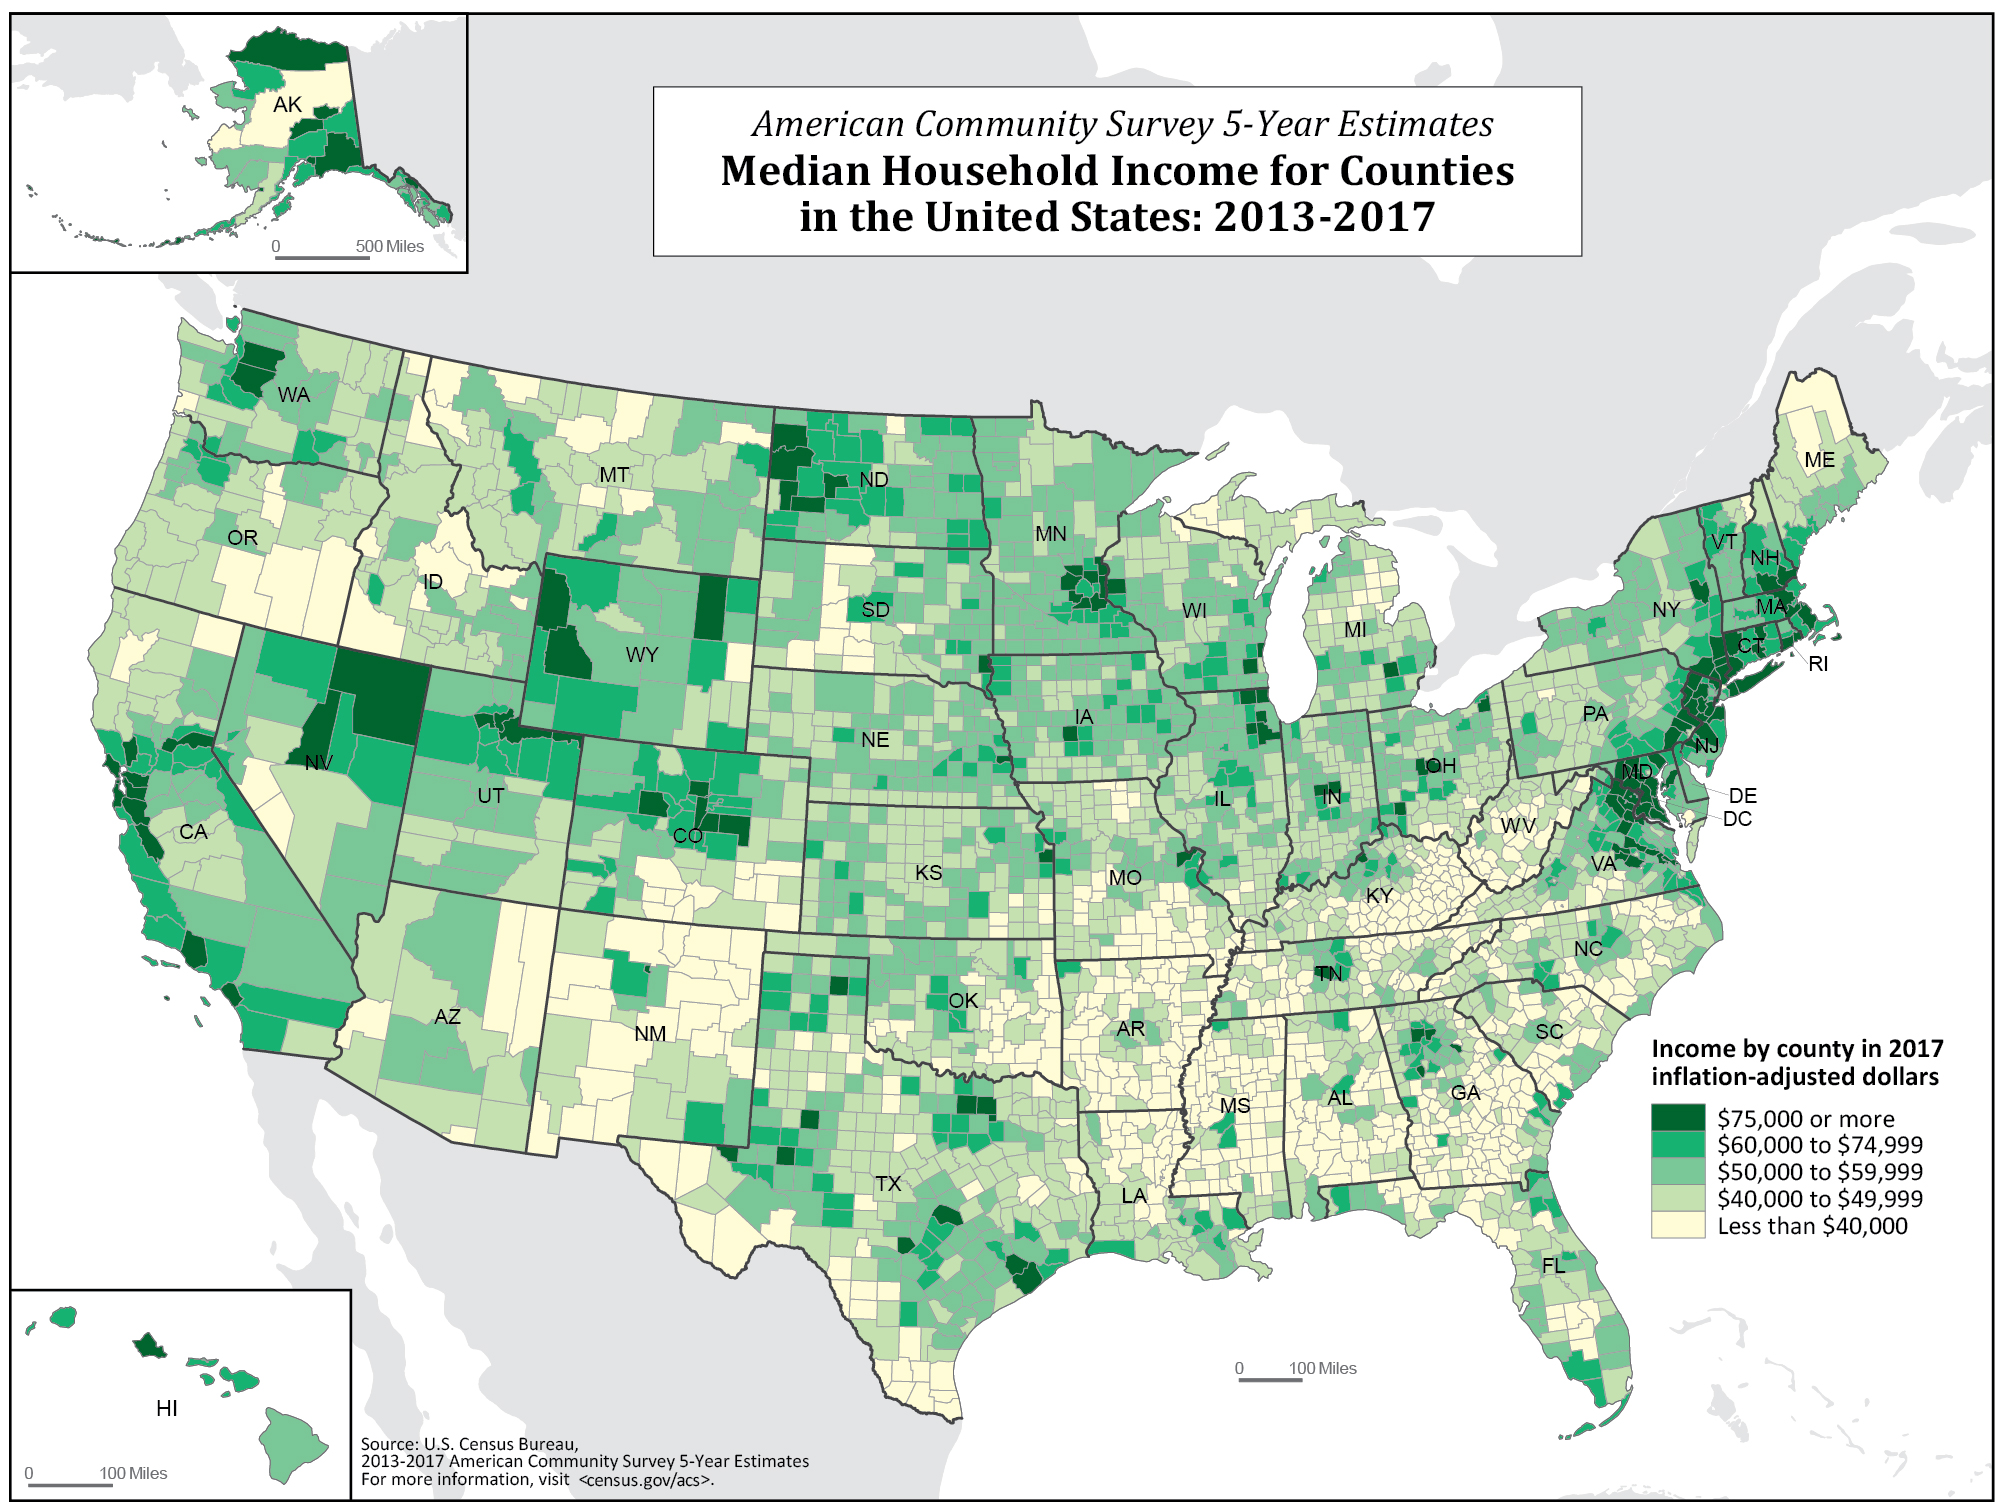

# Data Set information

* Extraction was done by Barry Becker from the 1994 Cencus database. A set of reasonable clean records was extracted using the following conditions ((AAGE > 16)& (AGI>100) & (AFNLWGT>1) &(HRSWK>0))

* Prediction task is to determine whether a person makes over 50K a year.

# Machine Learning Models:

* Logistic Regression
* SVC classifier
* Decision Tree Classifier
* Random Forest classifier
* Bagging classifier
* ExtraTree classifier
* Voting classifier

# Model Building Lifecycle

* Data ingesting/Gathering
* EDA
* Preprocessing
* Feature selection
* Model Building'
* Evaluation of the model

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.despine(left=True, right=True, bottom=True, top=True)
sns.set_style('white')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.warn('Alert')
warnings.warn('CAUTION!')



<Figure size 432x288 with 0 Axes>

In [79]:
columns=['age','work_class','final_weigth','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','Income']

test_columns=['age','work_class','final_weigth','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country']



In [80]:
df_train = pd.read_csv('../input/adultdatacsv/adult.data.csv',sep=',',names=columns,header=None)
df_test = pd.read_csv('../input/census-income-dataset1/adult.test.csv',sep=',',names=test_columns,header=0,index_col=False)

In [81]:
df_train

age        work_class final_weigth   education  education_num  \
0      age         workclass       fnlwgt   education  education-num   
1       39         State-gov        77516   Bachelors             13   
2       50  Self-emp-not-inc        83311   Bachelors             13   
3       38           Private       215646     HS-grad              9   
4       53           Private       234721        11th              7   
...    ...               ...          ...         ...            ...   
32557   27           Private       257302  Assoc-acdm             12   
32558   40           Private       154374     HS-grad              9   
32559   58           Private       151910     HS-grad              9   
32560   22           Private       201490     HS-grad              9   
32561   52      Self-emp-inc       287927     HS-grad              9   

           marital_status         occupation   relationship   race     sex  \
0          marital-status         occupation   relationship   race     sex   
1           Never-married       Adm-clerical  Not-in-family  White    Male   
2      Married-civ-spouse    Exec-managerial        Husband  White    Male   
3                Divorced  Handlers-cleaners  Not-in-family  White    Male   
4      Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
...                   ...                ...            ...    ...     ...   
32557  Married-civ-spouse       Tech-support           Wife  White  Female   
32558  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
32559             Widowed       Adm-clerical      Unmarried  White  Female   
32560       Never-married       Adm-clerical      Own-child  White    Male   
32561  Married-civ-spouse    Exec-managerial           Wife  White  Female   

       capital_gain  capital_loss  hours_per_week  native_country  Income  
0      capital-gain  capital-loss  hours-per-week  native-country  salary  
1              2174             0              40   United-States   <=50K  
2                 0             0              13   United-States   <=50K  
3                 0             0              40   United-States   <=50K  
4                 0             0              40   United-States   <=50K  
...             ...           ...             ...             ...     ...  
32557             0             0              38   United-States   <=50K  
32558             0             0              40   United-States    >50K  
32559             0             0              40   United-States   <=50K  
32560             0             0              20   United-States   <=50K  
32561         15024             0              40   United-States    >50K  

[32562 rows x 15 columns]

In [82]:
df_test

age     work_class  final_weigth      education  education_num  \
0       25        Private        226802           11th              7   
1       38        Private         89814        HS-grad              9   
2       28      Local-gov        336951     Assoc-acdm             12   
3       44        Private        160323   Some-college             10   
4       18              ?        103497   Some-college             10   
...    ...            ...           ...            ...            ...   
16276   39        Private        215419      Bachelors             13   
16277   64              ?        321403        HS-grad              9   
16278   38        Private        374983      Bachelors             13   
16279   44        Private         83891      Bachelors             13   
16280   35   Self-emp-inc        182148      Bachelors             13   

            marital_status          occupation     relationship  \
0            Never-married   Machine-op-inspct        Own-child   
1       Married-civ-spouse     Farming-fishing          Husband   
2       Married-civ-spouse     Protective-serv          Husband   
3       Married-civ-spouse   Machine-op-inspct          Husband   
4            Never-married                   ?        Own-child   
...                    ...                 ...              ...   
16276             Divorced      Prof-specialty    Not-in-family   
16277              Widowed                   ?   Other-relative   
16278   Married-civ-spouse      Prof-specialty          Husband   
16279             Divorced        Adm-clerical        Own-child   
16280   Married-civ-spouse     Exec-managerial          Husband   

                      race      sex  capital_gain  capital_loss  \
0                    Black     Male             0             0   
1                    White     Male             0             0   
2                    White     Male             0             0   
3                    Black     Male          7688             0   
4                    White   Female             0             0   
...                    ...      ...           ...           ...   
16276                White   Female             0             0   
16277                Black     Male             0             0   
16278                White     Male             0             0   
16279   Asian-Pac-Islander     Male          5455             0   
16280                White     Male             0             0   

       hours_per_week  native_country  
0                  40   United-States  
1                  50   United-States  
2                  40   United-States  
3                  40   United-States  
4                  30   United-States  
...               ...             ...  
16276              36   United-States  
16277              40   United-States  
16278              50   United-States  
16279              40   United-States  
16280              60   United-States  

[16281 rows x 14 columns]

In [83]:
df_train = df_train.iloc [1:,:]

In [84]:
df_train

age        work_class final_weigth   education education_num  \
1      39         State-gov        77516   Bachelors            13   
2      50  Self-emp-not-inc        83311   Bachelors            13   
3      38           Private       215646     HS-grad             9   
4      53           Private       234721        11th             7   
5      28           Private       338409   Bachelors            13   
...    ..               ...          ...         ...           ...   
32557  27           Private       257302  Assoc-acdm            12   
32558  40           Private       154374     HS-grad             9   
32559  58           Private       151910     HS-grad             9   
32560  22           Private       201490     HS-grad             9   
32561  52      Self-emp-inc       287927     HS-grad             9   

           marital_status         occupation   relationship   race     sex  \
1           Never-married       Adm-clerical  Not-in-family  White    Male   
2      Married-civ-spouse    Exec-managerial        Husband  White    Male   
3                Divorced  Handlers-cleaners  Not-in-family  White    Male   
4      Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
5      Married-civ-spouse     Prof-specialty           Wife  Black  Female   
...                   ...                ...            ...    ...     ...   
32557  Married-civ-spouse       Tech-support           Wife  White  Female   
32558  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
32559             Widowed       Adm-clerical      Unmarried  White  Female   
32560       Never-married       Adm-clerical      Own-child  White    Male   
32561  Married-civ-spouse    Exec-managerial           Wife  White  Female   

      capital_gain capital_loss hours_per_week native_country Income  
1             2174            0             40  United-States  <=50K  
2                0            0             13  United-States  <=50K  
3                0            0             40  United-States  <=50K  
4                0            0             40  United-States  <=50K  
5                0            0             40           Cuba  <=50K  
...            ...          ...            ...            ...    ...  
32557            0            0             38  United-States  <=50K  
32558            0            0             40  United-States   >50K  
32559            0            0             40  United-States  <=50K  
32560            0            0             20  United-States  <=50K  
32561        15024            0             40  United-States   >50K  

[32561 rows x 15 columns]

In [85]:
df = pd.concat([df_train, df_test], axis=0, ignore_index=True)

In [86]:
df.shape

(48842, 15)

In [87]:
df.memory_usage()

Index                128
age               390736
work_class        390736
final_weigth      390736
education         390736
education_num     390736
marital_status    390736
occupation        390736
relationship      390736
race              390736
sex               390736
capital_gain      390736
capital_loss      390736
hours_per_week    390736
native_country    390736
Income            390736
dtype: int64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  object
 1   work_class      48842 non-null  object
 2   final_weigth    48842 non-null  object
 3   education       48842 non-null  object
 4   education_num   48842 non-null  object
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  object
 11  capital_loss    48842 non-null  object
 12  hours_per_week  48842 non-null  object
 13  native_country  48842 non-null  object
 14  Income          32561 non-null  object
dtypes: object(15)
memory usage: 5.6+ MB


In [89]:
df.describe()

age work_class final_weigth education education_num  \
count   48842      48842        48842     48842         48842   
unique    146         18        34435        32            32   
top        36    Private       123011   HS-grad             9   
freq      898      22696           13     10501         10501   

            marital_status      occupation relationship   race    sex  \
count                48842           48842        48842  48842  48842   
unique                  14              30           12     10      4   
top     Married-civ-spouse  Prof-specialty      Husband  White   Male   
freq                 14976            4140        13193  27816  21790   

       capital_gain capital_loss hours_per_week native_country Income  
count         48842        48842          48842          48842  32561  
unique          232          174            183             83      2  
top               0            0             40  United-States  <=50K  
freq          29849        31042          15217          29170  24720

In [90]:
df.isna().sum()

age                   0
work_class            0
final_weigth          0
education             0
education_num         0
marital_status        0
occupation            0
relationship          0
race                  0
sex                   0
capital_gain          0
capital_loss          0
hours_per_week        0
native_country        0
Income            16281
dtype: int64

In [91]:
df.head()

age        work_class final_weigth  education education_num  \
0  39         State-gov        77516  Bachelors            13   
1  50  Self-emp-not-inc        83311  Bachelors            13   
2  38           Private       215646    HS-grad             9   
3  53           Private       234721       11th             7   
4  28           Private       338409  Bachelors            13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

  capital_gain capital_loss hours_per_week native_country Income  
0         2174            0             40  United-States  <=50K  
1            0            0             13  United-States  <=50K  
2            0            0             40  United-States  <=50K  
3            0            0             40  United-States  <=50K  
4            0            0             40           Cuba  <=50K

In [92]:
df

age        work_class final_weigth   education education_num  \
0      39         State-gov        77516   Bachelors            13   
1      50  Self-emp-not-inc        83311   Bachelors            13   
2      38           Private       215646     HS-grad             9   
3      53           Private       234721        11th             7   
4      28           Private       338409   Bachelors            13   
...    ..               ...          ...         ...           ...   
48837  39           Private       215419   Bachelors            13   
48838  64                 ?       321403     HS-grad             9   
48839  38           Private       374983   Bachelors            13   
48840  44           Private        83891   Bachelors            13   
48841  35      Self-emp-inc       182148   Bachelors            13   

            marital_status         occupation     relationship  \
0            Never-married       Adm-clerical    Not-in-family   
1       Married-civ-spouse    Exec-managerial          Husband   
2                 Divorced  Handlers-cleaners    Not-in-family   
3       Married-civ-spouse  Handlers-cleaners          Husband   
4       Married-civ-spouse     Prof-specialty             Wife   
...                    ...                ...              ...   
48837             Divorced     Prof-specialty    Not-in-family   
48838              Widowed                  ?   Other-relative   
48839   Married-civ-spouse     Prof-specialty          Husband   
48840             Divorced       Adm-clerical        Own-child   
48841   Married-civ-spouse    Exec-managerial          Husband   

                      race      sex capital_gain capital_loss hours_per_week  \
0                    White     Male         2174            0             40   
1                    White     Male            0            0             13   
2                    White     Male            0            0             40   
3                    Black     Male            0            0             40   
4                    Black   Female            0            0             40   
...                    ...      ...          ...          ...            ...   
48837                White   Female            0            0             36   
48838                Black     Male            0            0             40   
48839                White     Male            0            0             50   
48840   Asian-Pac-Islander     Male         5455            0             40   
48841                White     Male            0            0             60   

       native_country Income  
0       United-States  <=50K  
1       United-States  <=50K  
2       United-States  <=50K  
3       United-States  <=50K  
4                Cuba  <=50K  
...               ...    ...  
48837   United-States    NaN  
48838   United-States    NaN  
48839   United-States    NaN  
48840   United-States    NaN  
48841   United-States    NaN  

[48842 rows x 15 columns]

In [93]:
df['work_class'].value_counts()

Private              22696
 Private             11210
Self-emp-not-inc      2541
Local-gov             2093
?                     1836
 Self-emp-not-inc     1321
State-gov             1298
Self-emp-inc          1116
 Local-gov            1043
 ?                     963
Federal-gov            960
 State-gov             683
 Self-emp-inc          579
 Federal-gov           472
Without-pay             14
Never-worked             7
 Without-pay             7
 Never-worked            3
Name: work_class, dtype: int64

In [94]:
df[df['work_class']=='?']

age work_class final_weigth     education education_num  \
27     54          ?       180211  Some-college            10   
61     32          ?       293936       7th-8th             4   
69     25          ?       200681  Some-college            10   
77     67          ?       212759          10th             6   
106    17          ?       304873          10th             6   
...    ..        ...          ...           ...           ...   
32530  35          ?       320084     Bachelors            13   
32531  30          ?        33811     Bachelors            13   
32539  71          ?       287372     Doctorate            16   
32541  41          ?       202822       HS-grad             9   
32542  72          ?       129912       HS-grad             9   

              marital_status occupation   relationship                race  \
27        Married-civ-spouse          ?        Husband  Asian-Pac-Islander   
61     Married-spouse-absent          ?  Not-in-family               White   
69             Never-married          ?      Own-child               White   
77        Married-civ-spouse          ?        Husband               White   
106            Never-married          ?      Own-child               White   
...                      ...        ...            ...                 ...   
32530     Married-civ-spouse          ?           Wife               White   
32531          Never-married          ?  Not-in-family  Asian-Pac-Islander   
32539     Married-civ-spouse          ?        Husband               White   
32541              Separated          ?  Not-in-family               Black   
32542     Married-civ-spouse          ?        Husband               White   

          sex capital_gain capital_loss hours_per_week native_country Income  
27       Male            0            0             60          South   >50K  
61       Male            0            0             40              ?  <=50K  
69       Male            0            0             40  United-States  <=50K  
77       Male            0            0              2  United-States  <=50K  
106    Female        34095            0             32  United-States  <=50K  
...       ...          ...          ...            ...            ...    ...  
32530  Female            0            0             55  United-States   >50K  
32531  Female            0            0             99  United-States  <=50K  
32539    Male            0            0             10  United-States   >50K  
32541  Female            0            0             32  United-States  <=50K  
32542    Male            0            0             25  United-States  <=50K  

[1836 rows x 15 columns]

In [95]:
df['work_class'].mode().values[0]

'Private'

In [96]:
df.tail()

age     work_class final_weigth   education education_num  \
48837  39        Private       215419   Bachelors            13   
48838  64              ?       321403     HS-grad             9   
48839  38        Private       374983   Bachelors            13   
48840  44        Private        83891   Bachelors            13   
48841  35   Self-emp-inc       182148   Bachelors            13   

            marital_status        occupation     relationship  \
48837             Divorced    Prof-specialty    Not-in-family   
48838              Widowed                 ?   Other-relative   
48839   Married-civ-spouse    Prof-specialty          Husband   
48840             Divorced      Adm-clerical        Own-child   
48841   Married-civ-spouse   Exec-managerial          Husband   

                      race      sex capital_gain capital_loss hours_per_week  \
48837                White   Female            0            0             36   
48838                Black     Male            0            0             40   
48839                White     Male            0            0             50   
48840   Asian-Pac-Islander     Male         5455            0             40   
48841                White     Male            0            0             60   

       native_country Income  
48837   United-States    NaN  
48838   United-States    NaN  
48839   United-States    NaN  
48840   United-States    NaN  
48841   United-States    NaN

In [97]:
df[df['work_class']==' ?']['work_class'].values

array([' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?',
       ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?',
       ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?',
       ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?',
       ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?',
       ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?',
       ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?',
       ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?',
       ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?',
       ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?',
       ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?',
       ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?',
       ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?',
       ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' 

In [98]:
df['work_class'].replace(to_replace=df[df['work_class']==' ?']['work_class'].values,value=df['work_class'].mode().values[0],inplace=True)


In [99]:
df[df['occupation']==' ?']['occupation'].values

array([' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?',
       ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?',
       ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?',
       ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?',
       ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?',
       ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?',
       ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?',
       ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?',
       ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?',
       ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?',
       ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?',
       ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?',
       ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?',
       ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' ?', ' 

In [100]:
df['occupation'].mode()

0    Prof-specialty
dtype: object

In [101]:
df['occupation'].replace(to_replace=df[df['occupation']==' ?']['occupation'].values,value=df['occupation'].mode().values[0],inplace=True)


In [102]:
df[df['education']== 'Bachelors']

age        work_class final_weigth  education education_num  \
0      39         State-gov        77516  Bachelors            13   
1      50  Self-emp-not-inc        83311  Bachelors            13   
4      28           Private       338409  Bachelors            13   
9      42           Private       159449  Bachelors            13   
11     30         State-gov       141297  Bachelors            13   
...    ..               ...          ...        ...           ...   
32530  35                 ?       320084  Bachelors            13   
32531  30                 ?        33811  Bachelors            13   
32533  54           Private       337992  Bachelors            13   
32536  34           Private       160216  Bachelors            13   
32538  38           Private       139180  Bachelors            13   

           marital_status       occupation   relationship                race  \
0           Never-married     Adm-clerical  Not-in-family               White   
1      Married-civ-spouse  Exec-managerial        Husband               White   
4      Married-civ-spouse   Prof-specialty           Wife               Black   
9      Married-civ-spouse  Exec-managerial        Husband               White   
11     Married-civ-spouse   Prof-specialty        Husband  Asian-Pac-Islander   
...                   ...              ...            ...                 ...   
32530  Married-civ-spouse                ?           Wife               White   
32531       Never-married                ?  Not-in-family  Asian-Pac-Islander   
32533  Married-civ-spouse  Exec-managerial        Husband  Asian-Pac-Islander   
32536       Never-married  Exec-managerial  Not-in-family               White   
32538            Divorced   Prof-specialty      Unmarried               Black   

          sex capital_gain capital_loss hours_per_week native_country Income  
0        Male         2174            0             40  United-States  <=50K  
1        Male            0            0             13  United-States  <=50K  
4      Female            0            0             40           Cuba  <=50K  
9        Male         5178            0             40  United-States   >50K  
11       Male            0            0             40          India   >50K  
...       ...          ...          ...            ...            ...    ...  
32530  Female            0            0             55  United-States   >50K  
32531  Female            0            0             99  United-States  <=50K  
32533    Male            0            0             50          Japan   >50K  
32536  Female            0            0             55  United-States   >50K  
32538  Female        15020            0             45  United-States   >50K  

[5355 rows x 15 columns]

In [103]:
df.dropna(inplace=True)

In [104]:
df.tail()

age    work_class final_weigth   education education_num  \
32556  27       Private       257302  Assoc-acdm            12   
32557  40       Private       154374     HS-grad             9   
32558  58       Private       151910     HS-grad             9   
32559  22       Private       201490     HS-grad             9   
32560  52  Self-emp-inc       287927     HS-grad             9   

           marital_status         occupation relationship   race     sex  \
32556  Married-civ-spouse       Tech-support         Wife  White  Female   
32557  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
32558             Widowed       Adm-clerical    Unmarried  White  Female   
32559       Never-married       Adm-clerical    Own-child  White    Male   
32560  Married-civ-spouse    Exec-managerial         Wife  White  Female   

      capital_gain capital_loss hours_per_week native_country Income  
32556            0            0             38  United-States  <=50K  
32557            0            0             40  United-States   >50K  
32558            0            0             40  United-States  <=50K  
32559            0            0             20  United-States  <=50K  
32560        15024            0             40  United-States   >50K

In [105]:
df['age'] = df['age'].astype(str).astype(int)


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   work_class      32561 non-null  object
 2   final_weigth    32561 non-null  object
 3   education       32561 non-null  object
 4   education_num   32561 non-null  object
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  object
 11  capital_loss    32561 non-null  object
 12  hours_per_week  32561 non-null  object
 13  native_country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(1), object(14)
memory usage: 4.0+ MB


In [107]:
columns

['age',
 'work_class',
 'final_weigth',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'Income']

In [108]:
cat_variable=df.dtypes[df.dtypes=='object'].index

In [109]:
cat_variable

Index(['work_class', 'final_weigth', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'Income'],
      dtype='object')

In [110]:
for i in cat_variable:
    df[i]=df[i].str.strip()

In [111]:
print(f"The total number of Categorical Variables are {len(cat_variable)}\n")
for i in cat_variable:
    print(f"The {i} has the following category counts:\n")
    print(df[i].value_counts())
    print('\n')

The total number of Categorical Variables are 14

The work_class has the following category counts:

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: work_class, dtype: int64


The final_weigth has the following category counts:

164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: final_weigth, Length: 21648, dtype: int64


The education has the following category counts:

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Presch

In [112]:
df[cat_variable].describe()

work_class final_weigth education education_num      marital_status  \
count       32561        32561     32561         32561               32561   
unique          9        21648        16            16                   7   
top       Private       164190   HS-grad             9  Married-civ-spouse   
freq        22696           13     10501         10501               14976   

            occupation relationship   race    sex capital_gain capital_loss  \
count            32561        32561  32561  32561        32561        32561   
unique              15            6      5      2          119           92   
top     Prof-specialty      Husband  White   Male            0            0   
freq              4140        13193  27816  21790        29849        31042   

       hours_per_week native_country Income  
count           32561          32561  32561  
unique             94             42      2  
top                40  United-States  <=50K  
freq            15217          29170  24720

In [113]:
df[df['Income'] == '<=50K']['Income'].values

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [114]:
df['Income'].replace(to_replace=df[df['Income']=='<=50K']['Income'].values,value=1,inplace=True)
df['Income'].replace(to_replace=df[df['Income']=='>50K']['Income'].values,value=0,inplace=True)


In [115]:
df['Income'] = df['Income'].astype(float)

In [116]:
df['Income']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
32556    1.0
32557    0.0
32558    1.0
32559    1.0
32560    0.0
Name: Income, Length: 32561, dtype: float64

In [117]:
df.head()

age        work_class final_weigth  education education_num  \
0   39         State-gov        77516  Bachelors            13   
1   50  Self-emp-not-inc        83311  Bachelors            13   
2   38           Private       215646    HS-grad             9   
3   53           Private       234721       11th             7   
4   28           Private       338409  Bachelors            13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

  capital_gain capital_loss hours_per_week native_country  Income  
0         2174            0             40  United-States     1.0  
1            0            0             13  United-States     1.0  
2            0            0             40  United-States     1.0  
3            0            0             40  United-States     1.0  
4            0            0             40           Cuba     1.0

In [118]:
df[['final_weigth', 'education_num','capital_gain','capital_loss','hours_per_week']] = df[['final_weigth', 'education_num','capital_gain','capital_loss','hours_per_week']].astype(int)


In [119]:
df.dtypes

age                 int64
work_class         object
final_weigth        int64
education          object
education_num       int64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country     object
Income            float64
dtype: object

In [120]:
numerical_var = df.dtypes[df.dtypes != 'object'].index

In [121]:
print("The Statiscal Anaylsis for each variable of Numerical Columns are:\n")
for i in numerical_var:
    print(f"The {i} Feature Descriptive Statistics:\n")
    print(f"The Maximum value of {i} in {df[df['age']==df['age'].max()].age.values[0]} feature")
    print(f"The Average value of {i} in {df[i].mean()} feature")
    print(f"The Median value of {i} in {df[i].median()} feature")
    print(f"The Minimum value of {i} in {df[df['age']==df['age'].min()].age.values[0]} feature")
    print(f"The Total Number of Duplicates from {i} feature is {df[i].duplicated().sum()}\n\n")


The Statiscal Anaylsis for each variable of Numerical Columns are:

The age Feature Descriptive Statistics:

The Maximum value of age in 90 feature
The Average value of age in 38.58164675532078 feature
The Median value of age in 37.0 feature
The Minimum value of age in 17 feature
The Total Number of Duplicates from age feature is 32488


The final_weigth Feature Descriptive Statistics:

The Maximum value of final_weigth in 90 feature
The Average value of final_weigth in 189778.36651208502 feature
The Median value of final_weigth in 178356.0 feature
The Minimum value of final_weigth in 17 feature
The Total Number of Duplicates from final_weigth feature is 10913


The education_num Feature Descriptive Statistics:

The Maximum value of education_num in 90 feature
The Average value of education_num in 10.0806793403151 feature
The Median value of education_num in 10.0 feature
The Minimum value of education_num in 17 feature
The Total Number of Duplicates from education_num feature is 32545


In [122]:
df.corr()

age  final_weigth  education_num  capital_gain  \
age             1.000000     -0.076646       0.036527      0.077674   
final_weigth   -0.076646      1.000000      -0.043195      0.000432   
education_num   0.036527     -0.043195       1.000000      0.122630   
capital_gain    0.077674      0.000432       0.122630      1.000000   
capital_loss    0.057775     -0.010252       0.079923     -0.031615   
hours_per_week  0.068756     -0.018768       0.148123      0.078409   
Income         -0.234037      0.009463      -0.335154     -0.223329   

                capital_loss  hours_per_week    Income  
age                 0.057775        0.068756 -0.234037  
final_weigth       -0.010252       -0.018768  0.009463  
education_num       0.079923        0.148123 -0.335154  
capital_gain       -0.031615        0.078409 -0.223329  
capital_loss        1.000000        0.054256 -0.150526  
hours_per_week      0.054256        1.000000 -0.229689  
Income             -0.150526       -0.229689  1.000000

In [123]:
num_var = numerical_var[:-1].values

In [124]:
num_var

array(['age', 'final_weigth', 'education_num', 'capital_gain',
       'capital_loss', 'hours_per_week'], dtype=object)

<AxesSubplot:xlabel='Income', ylabel='age'>

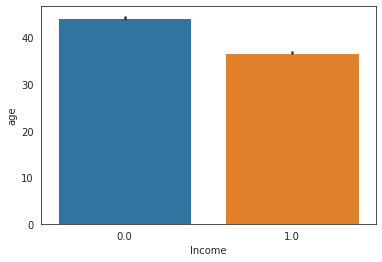

In [125]:
sns.barplot(x = df['Income'],y=df['age'], data =df)

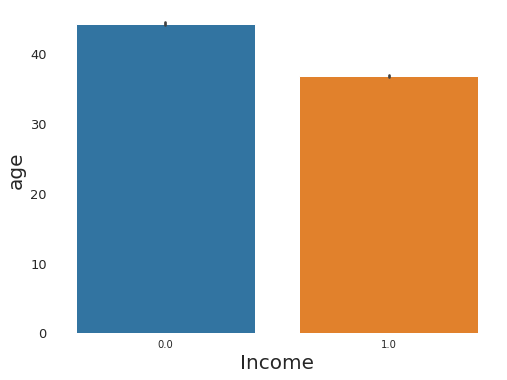

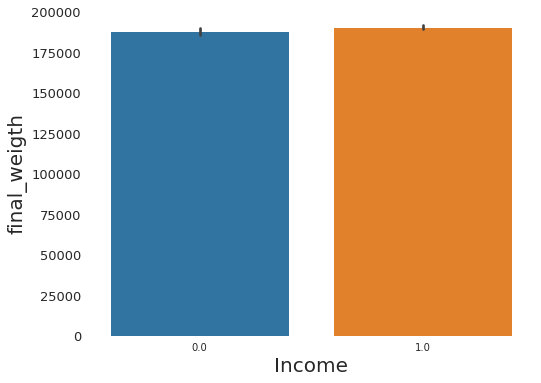

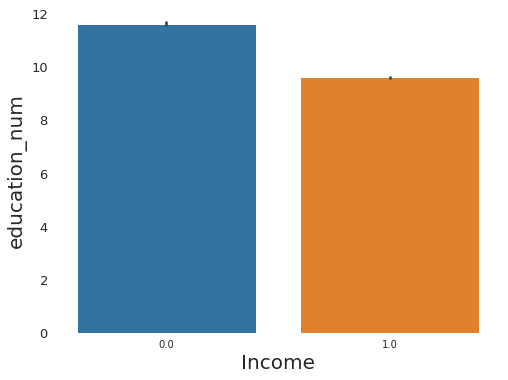

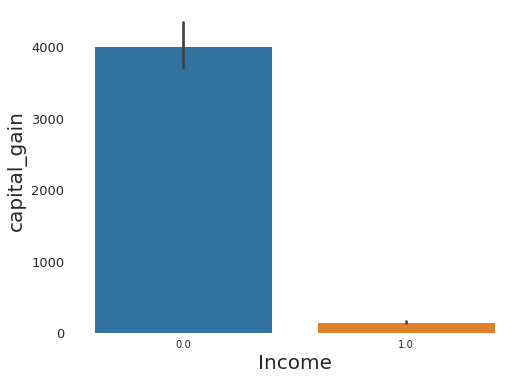

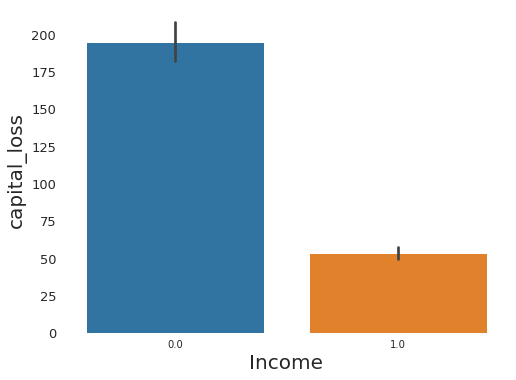

In [126]:
for i in num_var:
    fig, ax = plt.subplots(1,1, figsize =(8,6))
    sns.barplot(x=df['Income'], y=df[i], data=df)
    plt.xlabel(f'Income', fontsize=20)
    plt.ylabel(f'{i}', fontsize=20)
    plt.yticks(fontsize=13)
    plt.box(False)
    
               

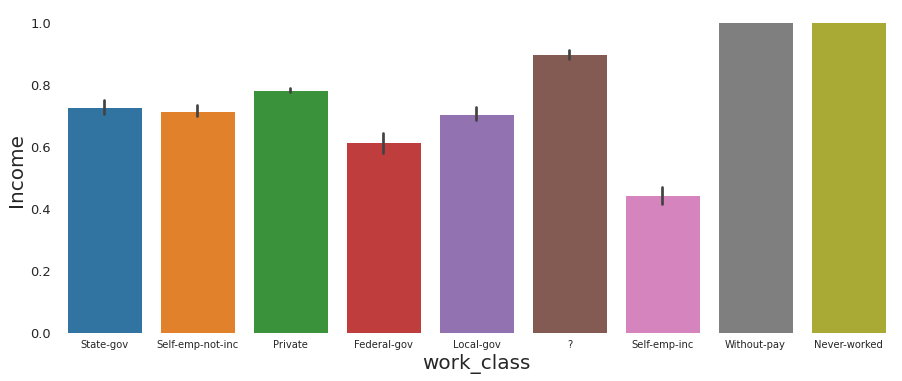

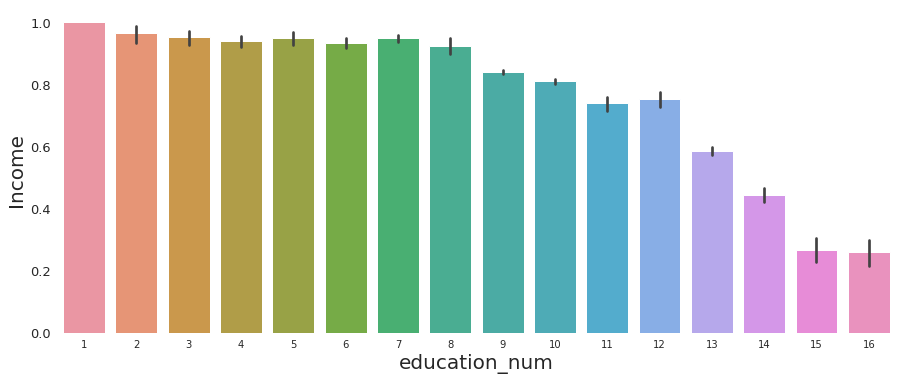

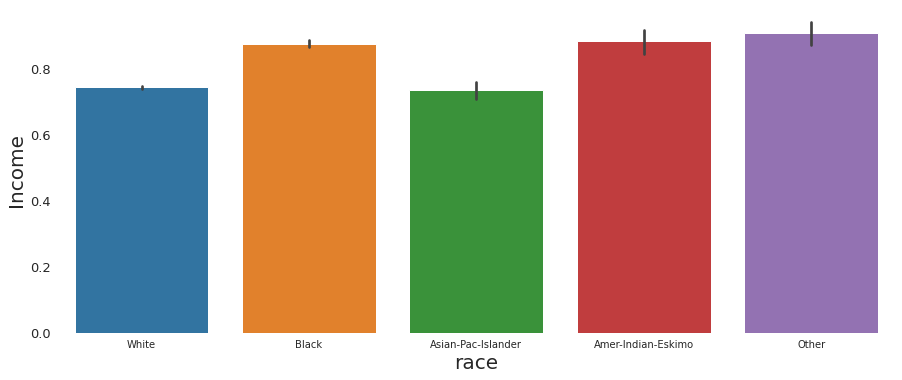

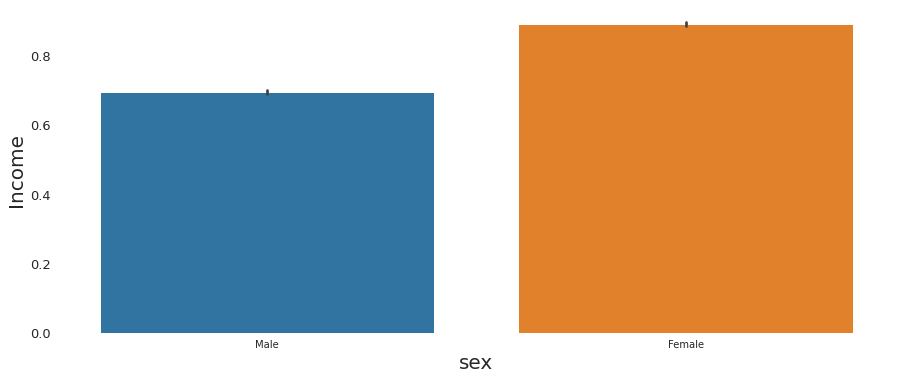

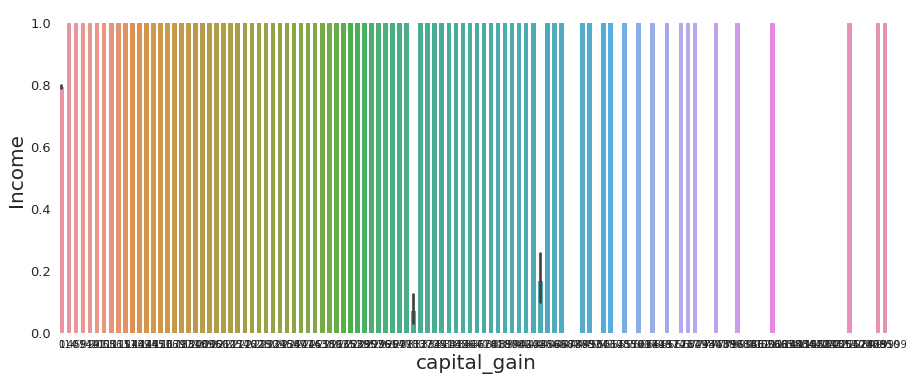

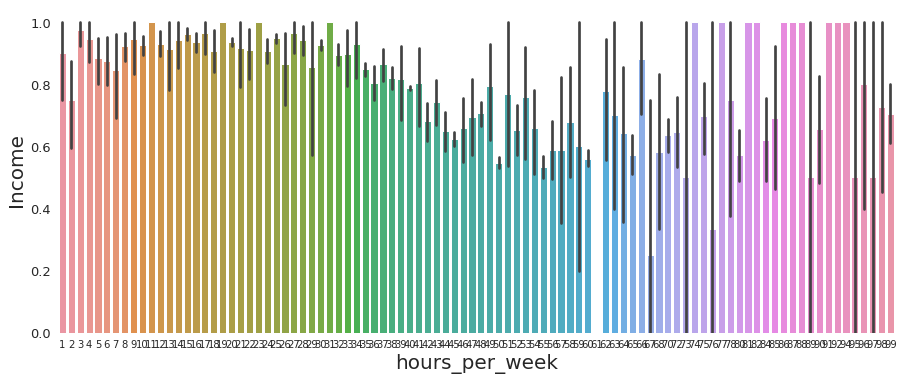

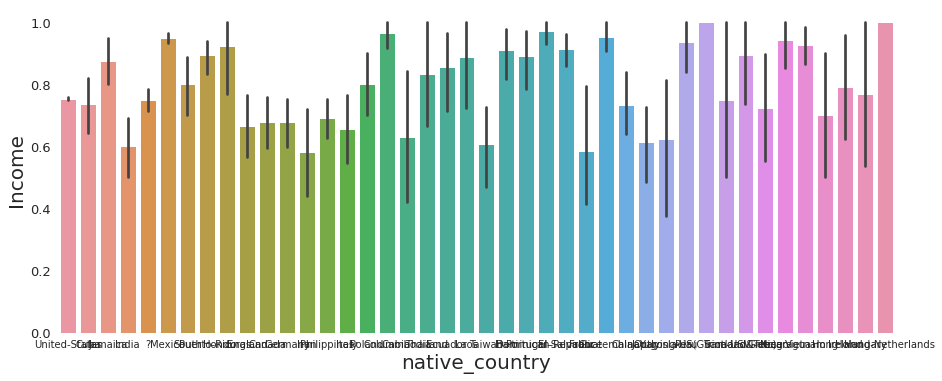

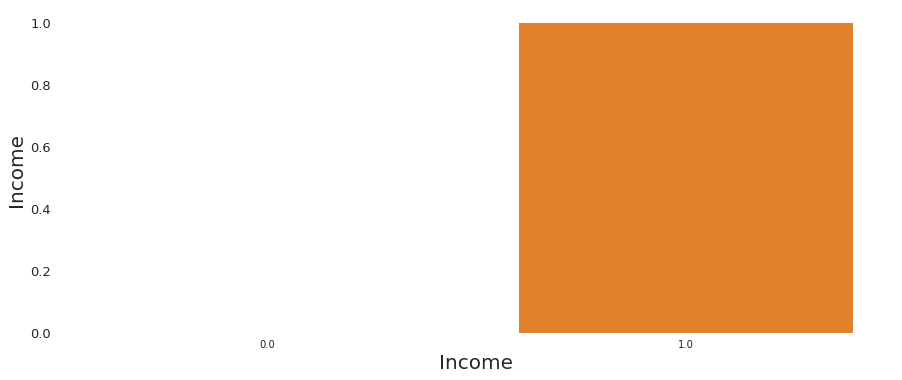

In [127]:
for i in cat_variable:
    fig, ax = plt.subplots(1,1, figsize =(15, 6))
    sns.barplot(x=df[i],y=df['Income'],data=df)
    plt.xlabel(f'{i}', fontsize=20)
    plt.ylabel(f'Income', fontsize=20)
    plt.yticks(fontsize=13)
    plt.box(False)

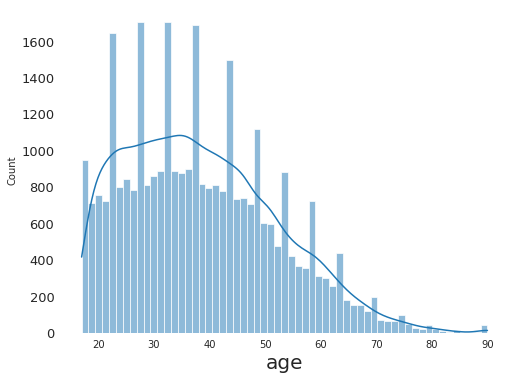

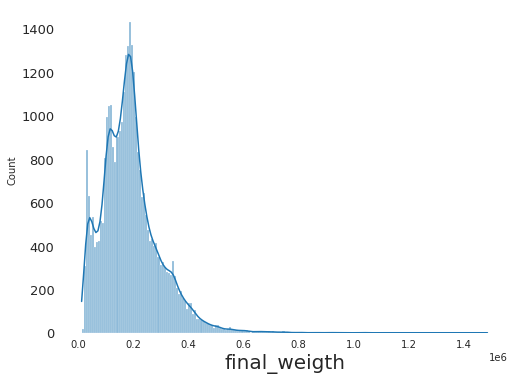

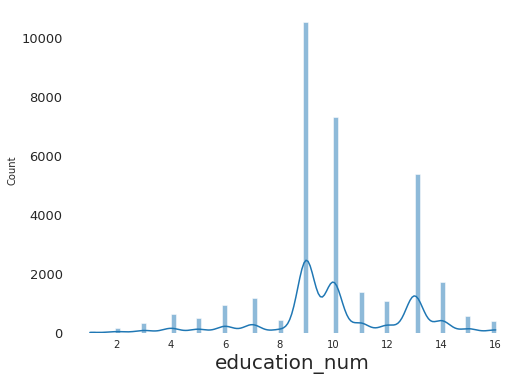

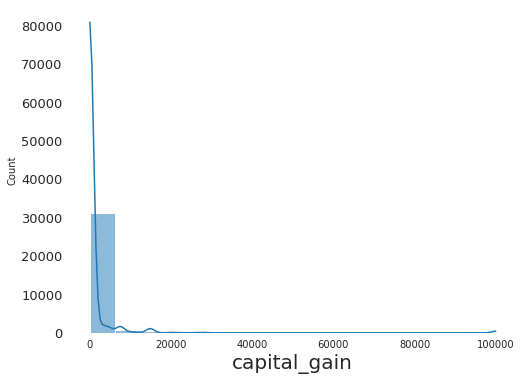

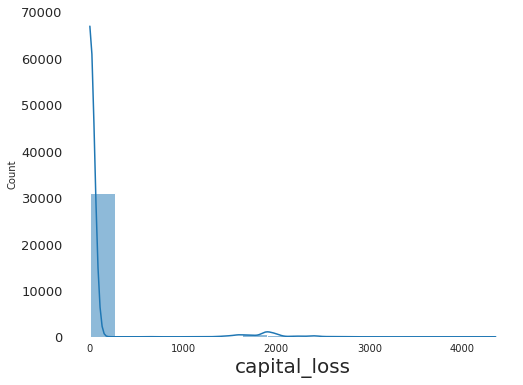

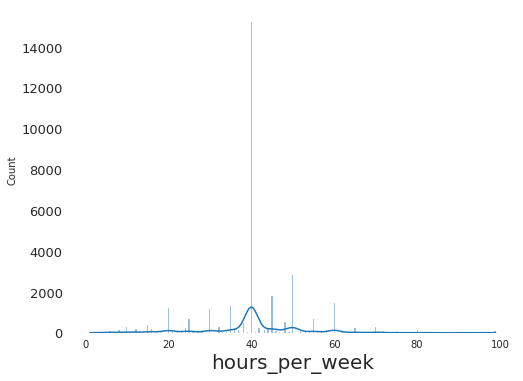

In [128]:
for i in num_var:
    fig, ax = plt.subplots(1,1, figsize=(8, 6))
    sns.histplot(df[i],kde=True)
    plt.xlabel(f'{i}', fontsize=20)
    plt.yticks(fontsize=13)
    plt.box(False)

In [129]:
df

age        work_class  final_weigth   education  education_num  \
0       39         State-gov         77516   Bachelors             13   
1       50  Self-emp-not-inc         83311   Bachelors             13   
2       38           Private        215646     HS-grad              9   
3       53           Private        234721        11th              7   
4       28           Private        338409   Bachelors             13   
...    ...               ...           ...         ...            ...   
32556   27           Private        257302  Assoc-acdm             12   
32557   40           Private        154374     HS-grad              9   
32558   58           Private        151910     HS-grad              9   
32559   22           Private        201490     HS-grad              9   
32560   52      Self-emp-inc        287927     HS-grad              9   

           marital_status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-managerial        Husband  White    Male   
2                Divorced  Handlers-cleaners  Not-in-family  White    Male   
3      Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4      Married-civ-spouse     Prof-specialty           Wife  Black  Female   
...                   ...                ...            ...    ...     ...   
32556  Married-civ-spouse       Tech-support           Wife  White  Female   
32557  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
32558             Widowed       Adm-clerical      Unmarried  White  Female   
32559       Never-married       Adm-clerical      Own-child  White    Male   
32560  Married-civ-spouse    Exec-managerial           Wife  White  Female   

       capital_gain  capital_loss  hours_per_week native_country  Income  
0              2174             0              40  United-States     1.0  
1                 0             0              13  United-States     1.0  
2                 0             0              40  United-States     1.0  
3                 0             0              40  United-States     1.0  
4                 0             0              40           Cuba     1.0  
...             ...           ...             ...            ...     ...  
32556             0             0              38  United-States     1.0  
32557             0             0              40  United-States     0.0  
32558             0             0              40  United-States     1.0  
32559             0             0              20  United-States     1.0  
32560         15024             0              40  United-States     0.0  

[32561 rows x 15 columns]

In [135]:
def find_outliers(feature):
    q1, q3 = df[feature].quantile([0.25,0.75])
    IQR = q3-q1
    lower_bound = q1 -1.5*(IQR)
    upper_bound = q3+1.5*(IQR)
    return (lower_bound,upper_bound)

In [136]:
q1, q3 = find_outliers('age')
q1, q3
len(df[(df['age']<q1) | (df['age']>q3)])

143

In [137]:
for i in num_var:
    lower_bound, upper_bound=find_outliers(i)
    print(f"The lower Bound is {lower_bound} and the upper Bound is {upper_bound}")
    length = len(df[(df[i]<q1) |( df[i]>q3)])
    print(f"The total outliers lying in {i} Feature are {length}\n\n")
    

The lower Bound is -2.0 and the upper Bound is 78.0
The total outliers lying in age Feature are 143


The lower Bound is -61009.0 and the upper Bound is 415887.0
The total outliers lying in final_weigth Feature are 32561


The lower Bound is 4.5 and the upper Bound is 16.5
The total outliers lying in education_num Feature are 0


The lower Bound is 0.0 and the upper Bound is 0.0
The total outliers lying in capital_gain Feature are 2712


The lower Bound is 0.0 and the upper Bound is 0.0
The total outliers lying in capital_loss Feature are 1519


The lower Bound is 32.5 and the upper Bound is 52.5
The total outliers lying in hours_per_week Feature are 341




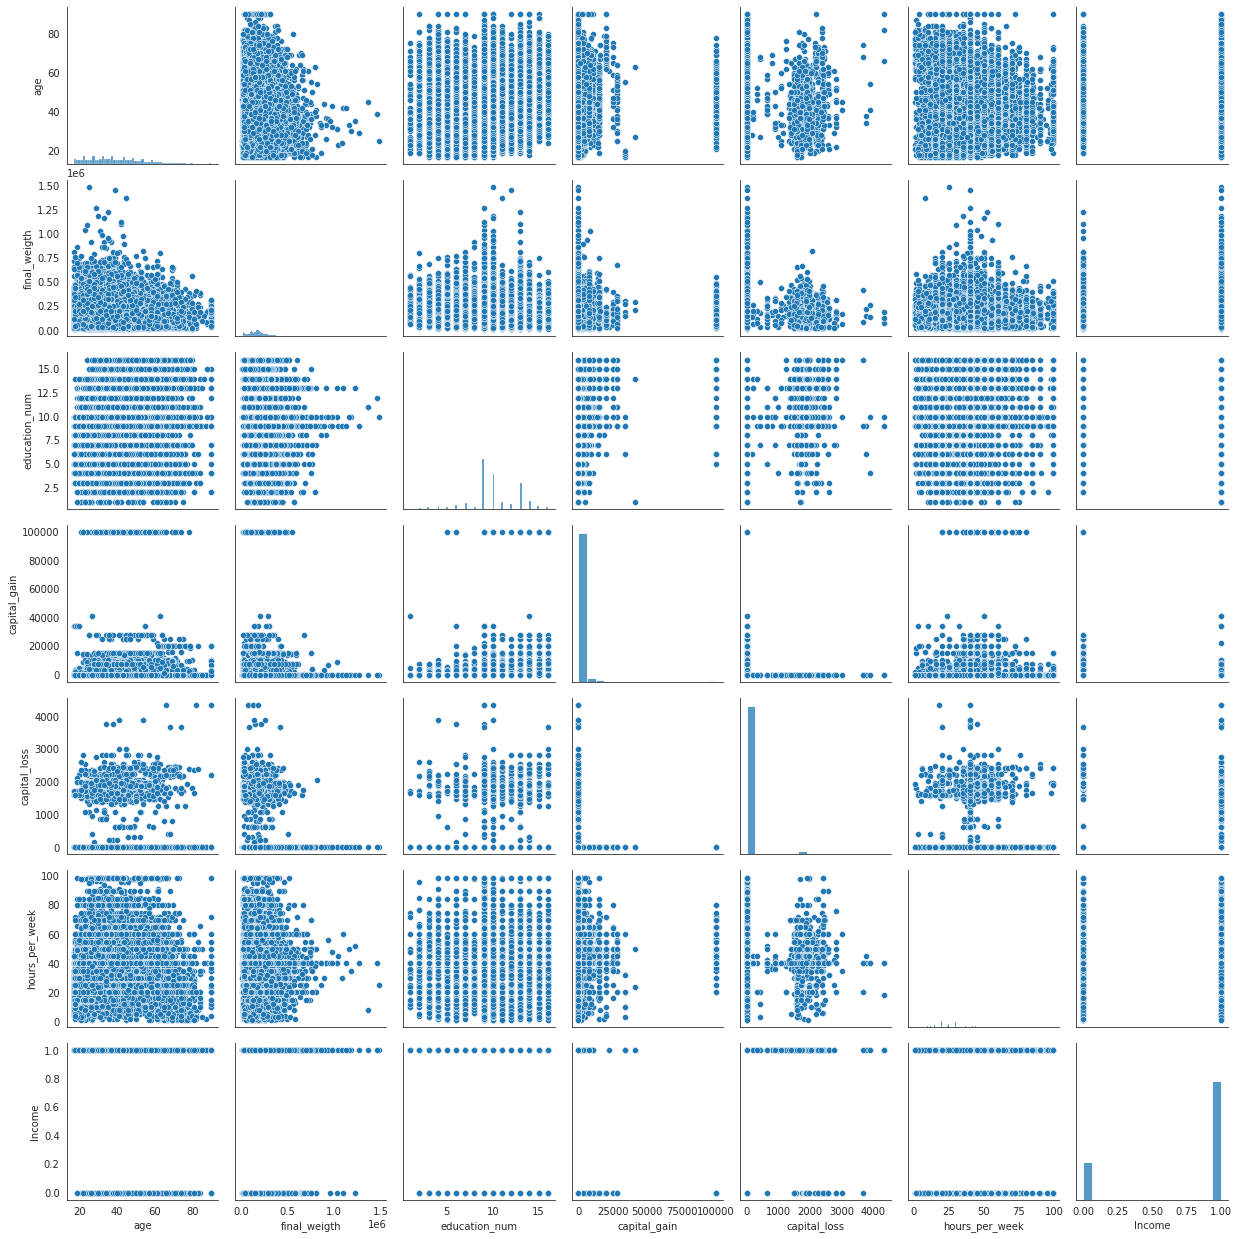

In [138]:
sns.pairplot(df)

In [139]:
fid, ax = plt.subplots(1,1, figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [140]:
df.head()

age        work_class  final_weigth  education  education_num  \
0   39         State-gov         77516  Bachelors             13   
1   50  Self-emp-not-inc         83311  Bachelors             13   
2   38           Private        215646    HS-grad              9   
3   53           Private        234721       11th              7   
4   28           Private        338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country  Income  
0          2174             0              40  United-States     1.0  
1             0             0              13  United-States     1.0  
2             0             0              40  United-States     1.0  
3             0             0              40  United-States     1.0  
4             0             0              40           Cuba     1.0

In [141]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [143]:
cat_variable=df.dtypes[df.dtypes=='object'].index
cat_variable

Index(['work_class', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')

In [144]:
for i in cat_variable:
    df[i] = label_encoder.fit_transform(df[i])
    

In [145]:
df.head()

age  work_class  final_weigth  education  education_num  marital_status  \
0   39           7         77516          9             13               4   
1   50           6         83311          9             13               2   
2   38           4        215646         11              9               0   
3   53           4        234721          1              7               2   
4   28           4        338409          9             13               2   

   occupation  relationship  race  sex  capital_gain  capital_loss  \
0           1             1     4    1          2174             0   
1           4             0     4    1             0             0   
2           6             1     4    1             0             0   
3           6             0     2    1             0             0   
4          10             5     2    0             0             0   

   hours_per_week  native_country  Income  
0              40              39     1.0  
1              13              39     1.0  
2              40              39     1.0  
3              40              39     1.0  
4              40               5     1.0

In [146]:
temp_df= df[~df['Income'].isna()]

In [147]:
temp_df.isna().sum().sum()

0

In [148]:
X = temp_df.drop('Income', axis=1)


In [149]:
y = temp_df['Income']

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state =42)

In [151]:
print(f"The Shape of the Training Data is {X_train.shape} and the output Feature is {y_train.shape}")
print(f"The Shape of the Testing Data is {X_test.shape} and the output Feature is {y_test.shape}")


The Shape of the Training Data is (21815, 14) and the output Feature is (21815,)
The Shape of the Testing Data is (10746, 14) and the output Feature is (10746,)


In [153]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [155]:
scaled_X_train = scalar.fit_transform(X_train)

In [156]:
scaled_X_test= scalar.transform(X_test)

Logistic Regression

In [157]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor

LogisticRegression()

In [158]:
regressor.fit(scaled_X_train, y_train)

LogisticRegression()

In [159]:
regressor.score(scaled_X_train, y_train)

0.8249369699747879

In [160]:
regressor.intercept_

array([1.49901719])

In [161]:
regressor.coef_

array([[-0.47049869,  0.03730441, -0.05535635, -0.0355949 , -0.84859952,
         0.34907934, -0.05145576,  0.17603101, -0.09574439, -0.42455602,
        -2.24089171, -0.26178186, -0.37521225, -0.040778  ]])

In [162]:
y1_pred = regressor.predict(scaled_X_test)

In [163]:
from sklearn.metrics import classification_report


In [164]:
print(classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.45      0.55      2550
         1.0       0.85      0.94      0.89      8196

    accuracy                           0.83     10746
   macro avg       0.78      0.70      0.72     10746
weighted avg       0.81      0.83      0.81     10746



In [165]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [167]:
ytrain_pred = regressor.predict_proba(scaled_X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = regressor.predict_proba(scaled_X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.854486062002402
Logistic test roc-auc: 0.8540859721145657


# Roc Curve

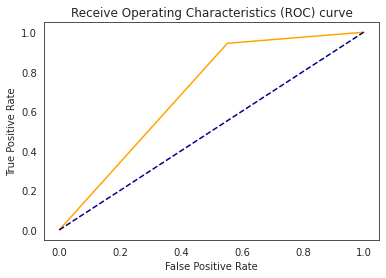

In [169]:
fpr,tpr,thresholds = roc_curve(y_test, y1_pred)
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
    plt.plot([0,1],[0,1], color ='darkblue', linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receive Operating Characteristics (ROC) curve')
    plt.show()

plot_roc_curve(fpr, tpr)

In [170]:
from sklearn.metrics import accuracy_score
accuracy_score(y1_pred, y_test)

0.8263539921831379

# Support Vector Classifier

In [171]:
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state = 42)
model

SVC(kernel='linear', random_state=42)

In [172]:
model.fit(scaled_X_train, y_train)


SVC(kernel='linear', random_state=42)

In [174]:
model.score(scaled_X_train,y_train)

0.8141645656658263

In [175]:
y_pred = model.predict(scaled_X_test)

In [176]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.820212171970966

In [177]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.32      0.46      2550
         1.0       0.82      0.98      0.89      8196

    accuracy                           0.82     10746
   macro avg       0.81      0.65      0.67     10746
weighted avg       0.82      0.82      0.79     10746



# ROC Curve

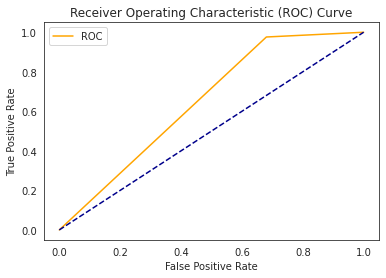

In [178]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

# Decision Tree classifier

In [179]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [180]:
model.score(X_train, y_train)

1.0

[Text(0.7147860984072412, 0.9891304347826086, 'X[7] <= 0.5\ngini = 0.367\nsamples = 21815\nvalue = [5291, 16524]'),
 Text(0.4949035856421608, 0.967391304347826, 'X[4] <= 12.5\ngini = 0.495\nsamples = 8887\nvalue = [4002, 4885]'),
 Text(0.369758914200937, 0.9456521739130435, 'X[10] <= 5095.5\ngini = 0.442\nsamples = 6177\nvalue = [2041, 4136]'),
 Text(0.279207425844653, 0.9239130434782609, 'X[11] <= 1782.5\ngini = 0.417\nsamples = 5868\nvalue = [1739, 4129]'),
 Text(0.10360285412170595, 0.9021739130434783, 'X[4] <= 7.5\ngini = 0.402\nsamples = 5640\nvalue = [1574, 4066]'),
 Text(0.023566481001187183, 0.8804347826086957, 'X[3] <= 0.5\ngini = 0.179\nsamples = 874\nvalue = [87, 787]'),
 Text(0.01239123720617666, 0.8586956521739131, 'X[6] <= 12.5\ngini = 0.277\nsamples = 193\nvalue = [32, 161]'),
 Text(0.009133167903432611, 0.8369565217391305, 'X[2] <= 199643.5\ngini = 0.23\nsamples = 158\nvalue = [21, 137]'),
 Text(0.0060006631377111505, 0.8152173913043478, 'X[2] <= 198099.5\ngini = 0.301\

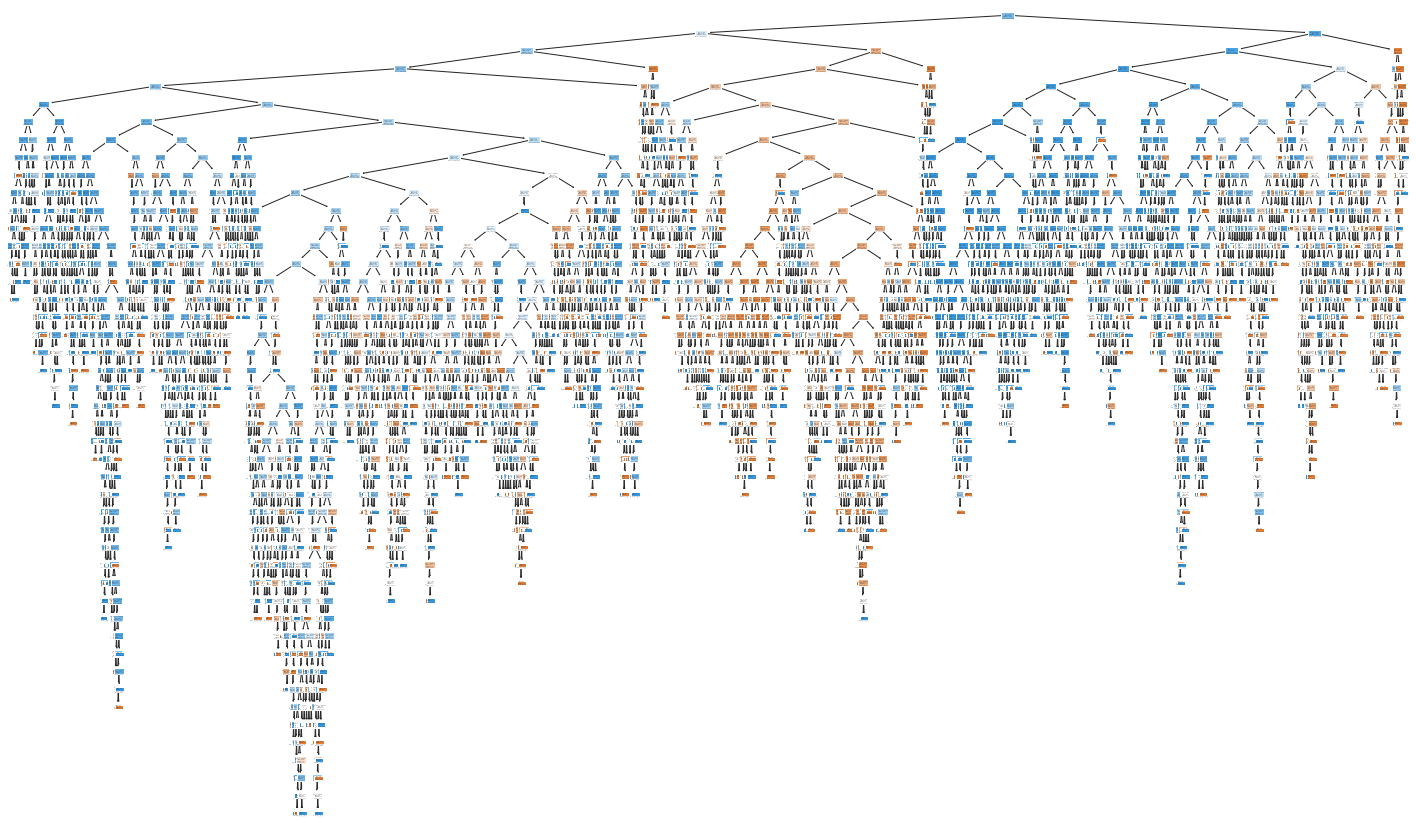

In [181]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model,filled=True)

In [182]:
y_predict = model.predict(X_test)


In [183]:
accuracy_score(y_test, y_predict)

0.8104410943606923

In [184]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.60      0.62      0.61      2550
         1.0       0.88      0.87      0.87      8196

    accuracy                           0.81     10746
   macro avg       0.74      0.74      0.74     10746
weighted avg       0.81      0.81      0.81     10746



# Random Forest classifier

In [185]:
from sklearn.ensemble import RandomForestClassifier
Rf_model = RandomForestClassifier()


In [186]:
Rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [187]:
y_pred_rf = Rf_model.predict(X_test)

In [188]:
accuracy_score(y_test, y_pred_rf)

0.8550158198399405

In [189]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.72      0.63      0.67      2550
         1.0       0.89      0.92      0.91      8196

    accuracy                           0.86     10746
   macro avg       0.81      0.78      0.79     10746
weighted avg       0.85      0.86      0.85     10746



# Bagging Classifier

In [192]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

model_bagging_svc = BaggingClassifier(base_estimator=SVC(), n_estimators = 50, random_state = 0).fit(X_train,y_train)

In [193]:
y_predict_bagging = model_bagging_svc.predict(X_test)

In [194]:
accuracy_score(y_test, y_predict_bagging)

0.7968546435883119

In [195]:
print(classification_report(y_test, y_predict_bagging))

              precision    recall  f1-score   support

         0.0       0.99      0.15      0.25      2550
         1.0       0.79      1.00      0.88      8196

    accuracy                           0.80     10746
   macro avg       0.89      0.57      0.57     10746
weighted avg       0.84      0.80      0.73     10746



# Extra Trees Classifier

In [196]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100, random_state= 0)


In [197]:
clf.fit(X_train, y_train)


ExtraTreesClassifier(random_state=0)

In [199]:
clf.score(X_train,y_train)

1.0

In [200]:
y_predict_clf = clf.predict(X_test)

In [201]:
accuracy_score(y_test, y_predict_clf)

0.8472920156337241

In [202]:
print(classification_report(y_test, y_predict_bagging))

              precision    recall  f1-score   support

         0.0       0.99      0.15      0.25      2550
         1.0       0.79      1.00      0.88      8196

    accuracy                           0.80     10746
   macro avg       0.89      0.57      0.57     10746
weighted avg       0.84      0.80      0.73     10746



# Voting Classifier

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(multi_class='multinomial', random_state = 1)
clf2 = RandomForestClassifier(n_estimators = 50, random_state = 1)
clf3 = GaussianNB()
eclf1 = VotingClassifier(estimators = [('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting = 'hard')
eclf1 = eclf1.fit(X_train, y_train)

In [207]:
y_predict_eclf1 = eclf1.predict(X_test)


In [208]:
accuracy_score(y_test, y_predict_eclf1)

0.8117439047087288

In [209]:
print(classification_report(y_test, y_predict_eclf1))

              precision    recall  f1-score   support

         0.0       0.76      0.30      0.43      2550
         1.0       0.82      0.97      0.89      8196

    accuracy                           0.81     10746
   macro avg       0.79      0.64      0.66     10746
weighted avg       0.80      0.81      0.78     10746



**From the Model Building Stage We can Conclude the Model with Random Forest Classifier got the maximum score of 85% so we can use this model for productionizing our application**